# Applied Machine Learning 
## Homework 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

# Question 1

In [2]:
# Loading the dataset as a dataframe. There are 2 csv files:- train and test.

fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# Visualizing the test data. There are 785 columns in total:- 784 pixel value columns and 1 label column. There are 784 features.

fashion_test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [4]:
'''
Creating validation dataset. We are splitting the train data using train_test_split with a split size of 0.16666 to get exactly
10,000 validation samples.
'''

x = fashion_train.drop('label', axis=1)
y = fashion_train['label']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.16666, random_state=42)

x_test = fashion_test.drop('label', axis=1)
y_test = fashion_test['label']

In [5]:
print("Train dataset size:", len(x_train))
print("Validation dataset size:", len(x_val))
print("Test dataset size:", len(x_test))

Train dataset size: 50000
Validation dataset size: 10000
Test dataset size: 10000


In [6]:
# Normalizing the features by dividing the feature values by 255, since the pixel values range from 0-255.

x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

### Apply PCA to the training portion of the dataset. How many components do you need to preserve 95% of the variance?

In [31]:
pca_model = PCA()
pca_model.fit(x_train)
cum_sum = np.cumsum(pca_model.explained_variance_ratio_)
dim = np.argmax(cum_sum >= 0.95) + 1

In [32]:
print(dim)

187


#### Answer:- We need 187 components to preserve 95% of the variance.

### Train a Random Forest classifier on the reduced dataset. Was training much faster than in Homework 2? Evaluate the classifier on the test set. How does it compare to the classifier from Homework 2?

In [21]:
model_rf_normal = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5)

start_time = time.time()
model_rf_normal.fit(x_train, y_train)
end_time = time.time()

runtime = end_time - start_time
print(f"Runtime of Random Forest on original: {runtime:.2f} seconds")

Runtime of Random Forest on original: 112.87 seconds


In [22]:
y_pred_test = model_rf_normal.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.8811


In [41]:
pca_model = PCA(n_components=187)
x_reduced = pca_model.fit_transform(x_train)

In [42]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5)

start_time = time.time()
model_rf.fit(x_reduced, y_train)
end_time = time.time()

runtime = end_time - start_time
print(f"Runtime of Random Forest: {runtime:.2f} seconds")

Runtime of Random Forest: 54.83 seconds


In [43]:
x_reduced_test = pca_model.fit_transform(x_test)

y_pred_test = model_rf.predict(x_reduced_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.6276


#### Answer:- The training of the random forest on the reduced training dataset took only 54.83 seconds, which is comparatably faster than what it took on the original dataset, which is 112.87 seconds. But it does not work well on the test dataset, producing an accuracy of only 62.76%, whereas the classifier trained on the original train dataset gave a prediction accuracy of 88.11%.

### Plot 10 random images in the original form (without PCA) and then plot them after you kept 95% of variance using PCA.

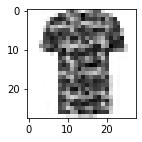

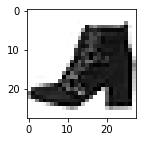

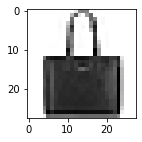

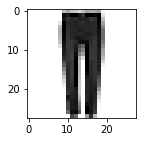

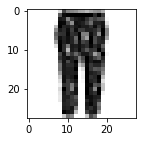

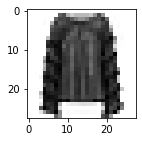

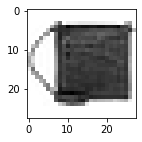

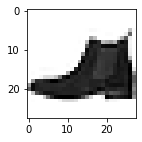

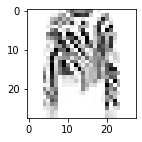

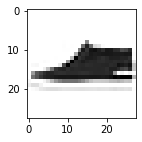

In [45]:
# 10 random images in the original form (without PCA)

disp_index_orig_train = [3,42,658,991,5632,10003,15111,23807,45666,49994]
for m in disp_index_orig_train:
    img_data = []
    k = []
    cnt = 1
    for z in x_train.loc[m]:
        if(int(cnt)%28 == 0):
            k.append(z)
            img_data.append(k)
            cnt+=1
            k=[]
        else:
            k.append(z)
            cnt+=1
    plt.figure(figsize=(2, 2))
    plt.imshow(img_data, cmap=plt.cm.binary)
    plt.show()

In [49]:
x_recovered = pca_model.inverse_transform(x_reduced)

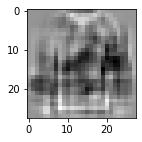

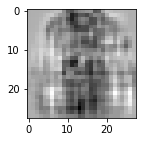

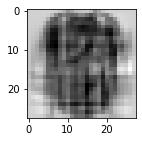

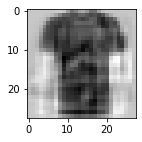

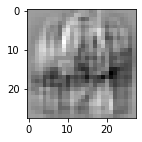

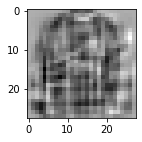

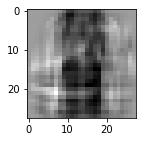

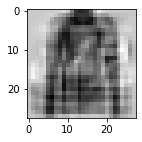

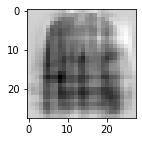

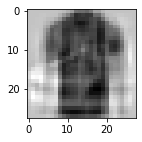

In [56]:
# 10 random images in the reduced form (with PCA)

disp_index_red_train = [3,42,658,991,5632,10003,15111,23807,45666,49994]
for m in disp_index_red_train:
    img_data = []
    k = []
    cnt = 1
    for z in x_recovered[m]:
        if(int(cnt)%28 == 0):
            k.append(z)
            img_data.append(k)
            cnt+=1
            k=[]
        else:
            k.append(z)
            cnt+=1
    plt.figure(figsize=(2, 2))
    plt.imshow(img_data, cmap=plt.cm.binary)
    plt.show()

### How much of the variance is explained with the first two principal components?

In [57]:
pca_model = PCA(n_components = 2)
x_2D = pca_model.fit_transform(x_train)

In [58]:
pca_model.explained_variance_ratio_

array([0.29012924, 0.17735222])

#### Answer:- 29.01% of the dataset's variance lies along the first principal component and 17.73% lies along the second principal component. Therefore the first two principal components explain about 46.74% of the dataset's variance.

### Use PCA to reduce dimensionality to only 2 dimensions. Plot 1000 random images from the training set in the 2D space spanned by the first two principal components. Use a scatterplot with 10 different colors to represent each image’s target class. Repeat the process and create the same type of plots for t-SNE, LLE and MDS. Which of the visualizations do you prefer and why?

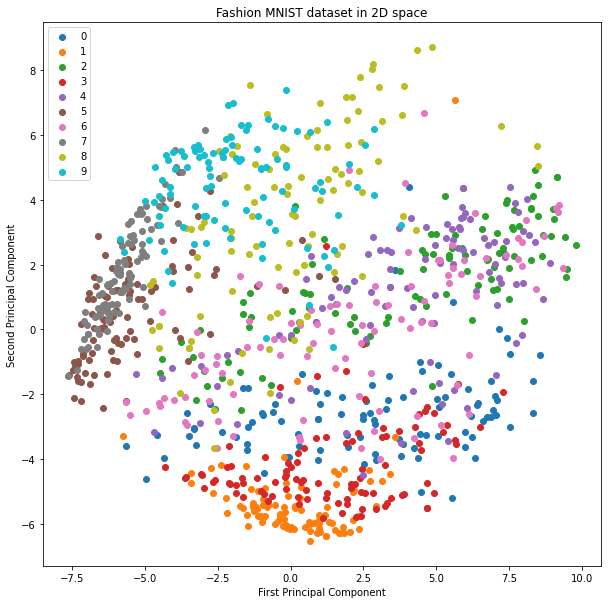

In [66]:
# PCA

x_train_reshape = x_train.to_numpy().reshape(-1, 28*28)
pca = PCA(n_components=2, random_state=42)
x_train_reduced = pca.fit_transform(x_train_reshape)

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(10):
    indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(indices, 100)
    ax.scatter(x_train_reduced[random_indices, 0], x_train_reduced[random_indices, 1], label=str(i))
ax.legend()
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Fashion MNIST dataset in 2D space')
plt.show()

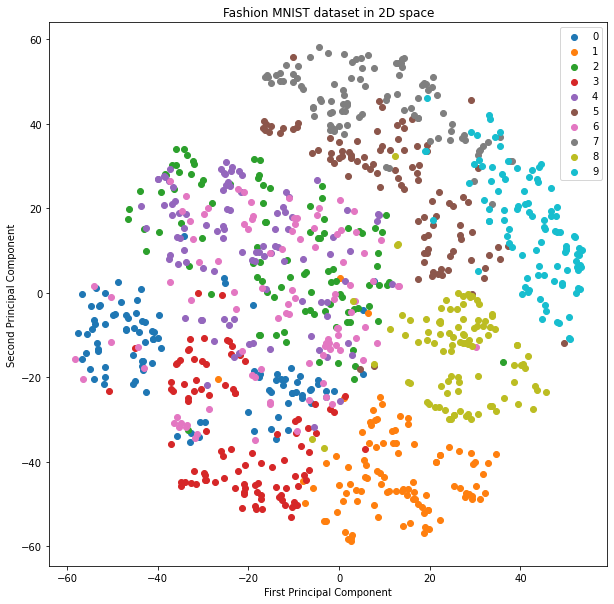

In [67]:
# t-SNE

x_train_reshape = x_train.to_numpy().reshape(-1, 28*28)
tsne = TSNE(n_components=2, random_state=42)
x_train_reduced = tsne.fit_transform(x_train_reshape)

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(10):
    indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(indices, 100)
    ax.scatter(x_train_reduced[random_indices, 0], x_train_reduced[random_indices, 1], label=str(i))
ax.legend()
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Fashion MNIST dataset in 2D space')
plt.show()

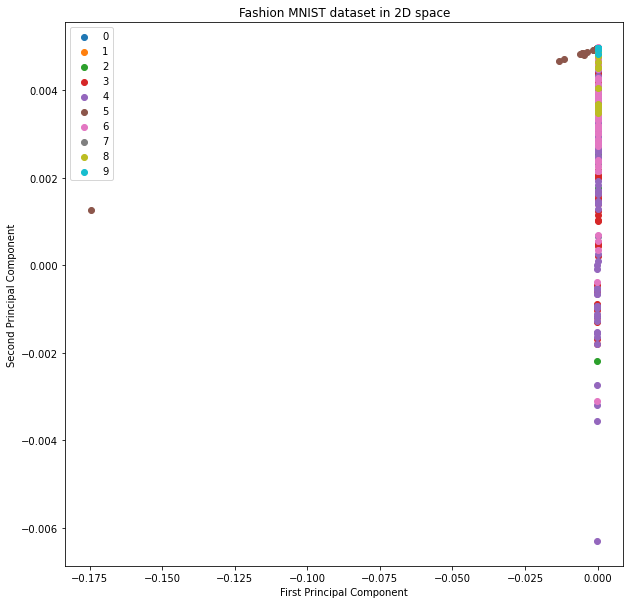

In [69]:
# LLE

x_train_reshape = x_train.to_numpy().reshape(-1, 28*28)
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
x_train_reduced = lle.fit_transform(x_train_reshape)

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(10):
    indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(indices, 100)
    ax.scatter(x_train_reduced[random_indices, 0], x_train_reduced[random_indices, 1], label=str(i))
ax.legend()
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Fashion MNIST dataset in 2D space')
plt.show()

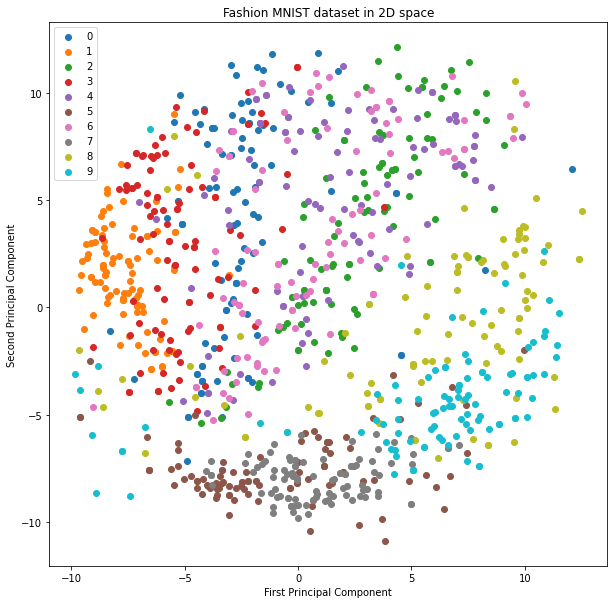

In [18]:
# MDS

x_train_mds = x_train[:3000]
x_train_reshape = x_train_mds.to_numpy().reshape(-1, 28*28)
mds = MDS(n_components=2, random_state=42)
x_train_reduced = mds.fit_transform(x_train_reshape)

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(10):
    indices = np.where(y_train == i)[0]
    indices_range = []
    for k in range(0,len(indices)):
        if(indices[k]<3000):
            indices_range.append(indices[k])
    indices_range = np.array(indices_range)
    random_indices = np.random.choice(indices_range, 100)
    ax.scatter(x_train_reduced[random_indices, 0], x_train_reduced[random_indices, 1], label=str(i))
ax.legend()
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Fashion MNIST dataset in 2D space')
plt.show()

#### Answer:- PCA, t-SNE and MDS all produce decent enough graphs where clusters are visible. But I would prefer t-SNE because the clusters produced are more prominent, dense and separated. It keeps overlapping to a minimum. Also it is comparatably faster than PCA and MDS.

### Take 10000 samples of the training portion of fashion MNIST dataset and cluster the images using KMeans. To speed up the algorithm, use PCA to reduce the dimensionality of the dataset. Ensure that you have a good number of clusters using one of the techniques we discussed in class. Visualize the clusters (you can show only a subset of images): do you see similar clothing items in each cluster?

In [15]:
x_train_reshape = x_train.to_numpy().reshape(-1, 28*28)
np.random.seed(42)
indices = np.random.choice(x_train_reshape.shape[0], size=10000, replace=False)
x_train_sampled = x_train_reshape[indices]
pca = PCA(n_components=187, random_state=42)
x_train_reduced = pca.fit_transform(x_train_sampled)

num_clusters = [4,5,6,7,8,9,10]
s_score = []
inertia = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_train_reduced)
    s_score.append(silhouette_score(x_train_reduced, kmeans.labels_))
    inertia.append(kmeans.inertia_)

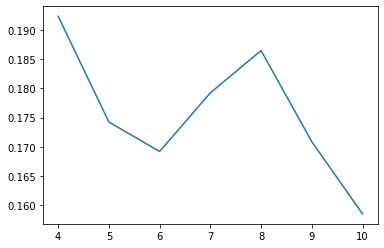

In [17]:
# Silhouette score versus number of clusters

plt.plot(num_clusters, s_score)

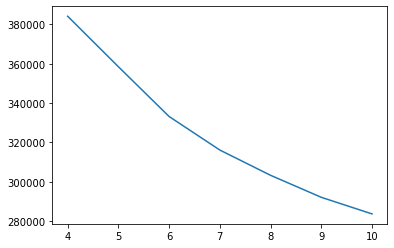

In [18]:
# Inertia versus number of clusters

plt.plot(num_clusters, inertia)

In [19]:
'''
Silhoutte vs. number of clusters plot shows the highest silhoutte score for k=4.
Inertia vs. number of clusters donot show any clear elbow, hence we proceed with k=4.
'''

'\nSilhoutte vs. number of clusters plot shows the highest silhoutte score for k=4.\nInertia vs. number of clusters donot show any clear elbow, hence we proceed with k=4.\n'

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(x_train_reduced)

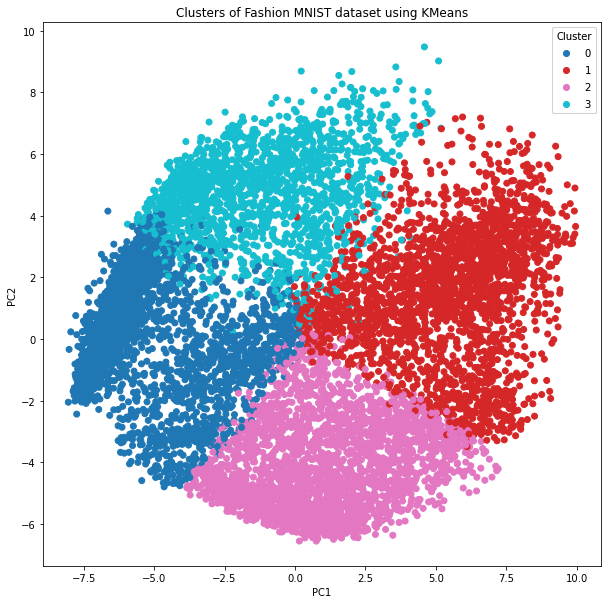

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=labels, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Clusters of Fashion MNIST dataset using KMeans')
plt.show()

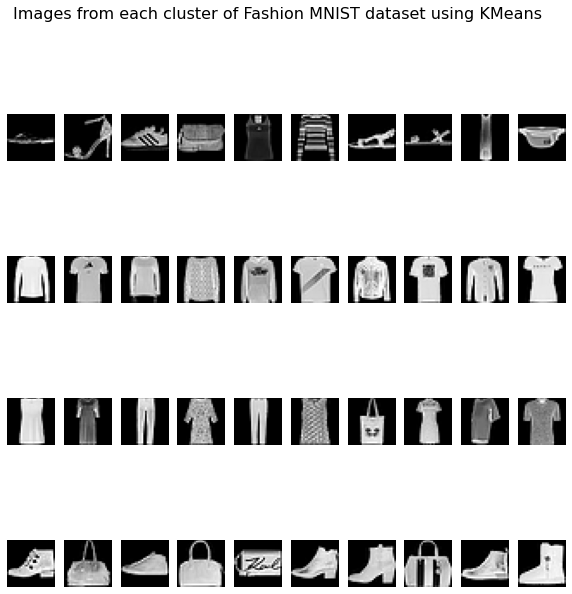

In [66]:
fig, ax = plt.subplots(nrows=4, ncols=10, figsize=(10, 10))
for i in range(4):
    cluster_indices = np.where(labels == i)[0]
    sample_indices = np.random.choice(cluster_indices, size=10, replace=False)
    for j, idx in enumerate(sample_indices):
        ax[i, j].imshow(x_train_sampled[idx].reshape(28, 28), cmap='gray')
        ax[i, j].axis('off')
plt.suptitle('Images from each cluster of Fashion MNIST dataset using KMeans', fontsize=16)
plt.show()

#### Answer:- Yes similar clothing items in each cluster is visible. We can see shoes being clustered with shoes, shirts being clustered with shirts, and so on. The clusters produced are decent, provided we compressed the data to only 187 dimensions.

### Take 10000 samples of the training portion of fashion MNIST dataset and cluster the images using a Gaussian mixture model. To speed up the algorithm, use PCA to reduce the dimensionality of the dataset. Ensure that you have a good number of clusters using one of the techniques we discussed in the class. Visualize the clusters (you can show only a subset of images): do you see similar clothing items in each cluster? Use the model to generate 20 new clothing items (using the sample() method), and visualize them (since you used PCA, you will need to use its inverse_transform() method).

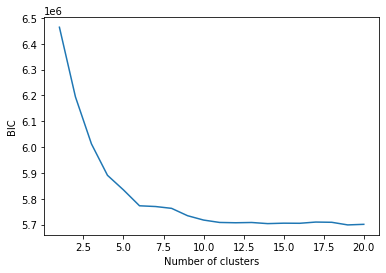

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Randomly sample 10000 images from the training set
sample_idx = np.random.choice(x_train.shape[0], 10000, replace=False)
x_sample = x_train[sample_idx]

# Flatten the images and apply PCA to reduce dimensionality to 50
x_sample_flat = x_sample.reshape(-1, 784)
pca = PCA(n_components=50)
x_sample_pca = pca.fit_transform(x_sample_flat)

# Use Bayesian information criterion to determine the optimal number of clusters
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x_sample_pca) for n in n_components]
bic = [m.bic(x_sample_pca) for m in models]
plt.plot(n_components, bic)
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

In [4]:
# Fit a Gaussian mixture model with 10 clusters
n_clusters = 10
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
gmm.fit(x_sample_pca)

# Use the model to predict cluster assignments for all images in the dataset
x_train_flat = x_train.reshape(-1, 784)
x_train_pca = pca.transform(x_train_flat)
labels = gmm.predict(x_train_pca)

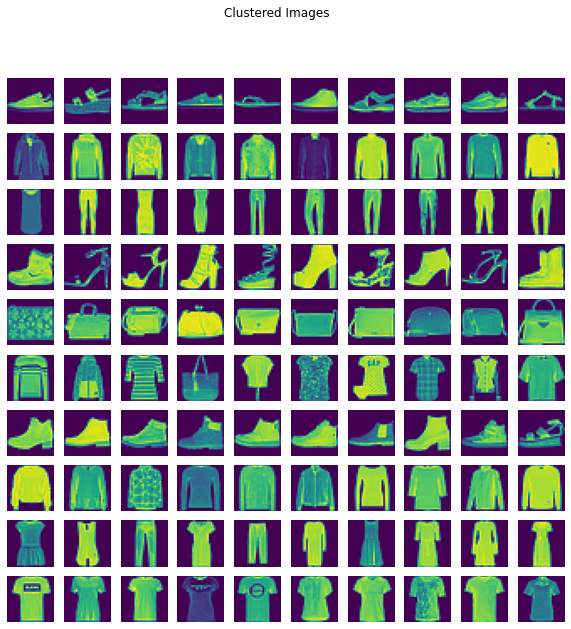

In [5]:
# Visualize a subset of images from each cluster
fig, axs = plt.subplots(n_clusters, 10, figsize=(10, 10))
for i in range(n_clusters):
    idxs = np.where(labels == i)[0]
    for j in range(10):
        axs[i, j].imshow(x_train[idxs[j]])
        axs[i, j].axis('off')
plt.suptitle('Clustered Images')
plt.show()

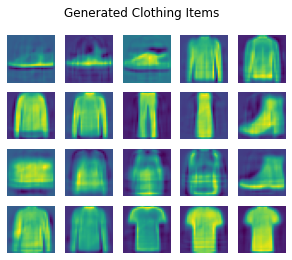

In [6]:
# Generate 20 new clothing items using the GMM and PCA
new_samples_pca = gmm.sample(n_samples=20)[0]
new_samples_flat = pca.inverse_transform(new_samples_pca)
new_samples = new_samples_flat.reshape(-1, 28, 28)
fig, axs = plt.subplots(4, 5, figsize=(5, 4))
for i in range(4):
    for j in range(5):
        axs[i, j].imshow(new_samples[i * 5 + j])
        axs[i, j].axis('off')
plt.suptitle('Generated Clothing Items')
plt.show()

#### Answer:- We can see that similar clothing items are mostly grouped together. For example, one cluster contains primarily shoes, another contains mostly dresses, and another contains mostly shirts. The generated clothing items also resemble the clothing items in the dataset, indicating that the GMM and PCA have captured the main features of the dataset.

### Build a fully connected (dense) feedforward neural network with two hidden layers using Keras (within Tensorflow) and train it on 50k Fashion MNIST training images. First hidden layer should contain 200 neurons and second hidden layer should contain 50 neurons. The hidden layers should have ReLU activation function. Train the network for 100 epochs. Plot training and validation loss and accuracy as a function of training epochs. Try three different learning rates of your choice (make the plots for each learning rate). Run the network on the test portion of the dataset using best-performing learning rate and report loss and accuracy. How many parameters does the network have? How many of those parameters are bias parameters?

Epoch 1/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7511 - accuracy: 0.7531 - val_loss: 0.5262 - val_accuracy: 0.8107
Epoch 2/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4994 - accuracy: 0.8273 - val_loss: 0.4790 - val_accuracy: 0.8260
Epoch 3/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4546 - accuracy: 0.8409 - val_loss: 0.4473 - val_accuracy: 0.8435
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4283 - accuracy: 0.8518 - val_loss: 0.4112 - val_accuracy: 0.8528
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4089 - accuracy: 0.8568 - val_loss: 0.4154 - val_accuracy: 0.8527
Epoch 6/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3907 - accuracy: 0.8626 - val_loss: 0.4048 - val_accuracy: 0.8528
Epoch 7/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3772 - accuracy: 0.8680 - val_loss: 0.3808 - val_ac

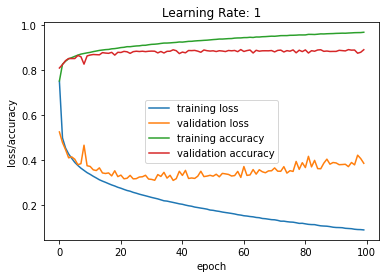

313/313 [==============================] - 0s 770us/step - loss: 0.4074 - accuracy: 0.8848


Learning Rate: 1
Test loss: 0.40740853548049927
Test accuracy: 0.8848000168800354
Total number of parameters: 167560
Number of bias parameters: 260
Epoch 1/100
1688/1688 [==============================] - 3s 1ms/step - loss: 0.7491 - accuracy: 0.7477 - val_loss: 0.5918 - val_accuracy: 0.7945
Epoch 2/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4938 - accuracy: 0.8283 - val_loss: 0.4644 - val_accuracy: 0.8348
Epoch 3/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4470 - accuracy: 0.8444 - val_loss: 0.4337 - val_accuracy: 0.8452
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4168 - accuracy: 0.8548 - val_loss: 0.4293 - val_accuracy: 0.8448
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3968 - accuracy: 0.8610 - val_loss: 0.4674 - val_accuracy: 0.8417
Epoch 6/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3820 - accuracy: 0.8649 - val_loss: 0.3854 - val

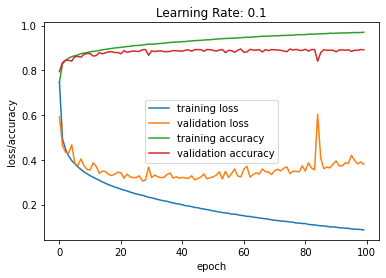

313/313 [==============================] - 0s 815us/step - loss: 0.4071 - accuracy: 0.8880


Learning Rate: 0.1
Test loss: 0.4071404039859772
Test accuracy: 0.8880000114440918
Total number of parameters: 167560
Number of bias parameters: 260
Epoch 1/100
1688/1688 [==============================] - 3s 1ms/step - loss: 0.7518 - accuracy: 0.7538 - val_loss: 0.5420 - val_accuracy: 0.8095
Epoch 2/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4976 - accuracy: 0.8266 - val_loss: 0.4687 - val_accuracy: 0.8325
Epoch 3/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4509 - accuracy: 0.8432 - val_loss: 0.4344 - val_accuracy: 0.8452
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4217 - accuracy: 0.8533 - val_loss: 0.4098 - val_accuracy: 0.8572
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4016 - accuracy: 0.8601 - val_loss: 0.4069 - val_accuracy: 0.8570
Epoch 6/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3848 - accuracy: 0.8648 - val_loss: 0.3864 - va

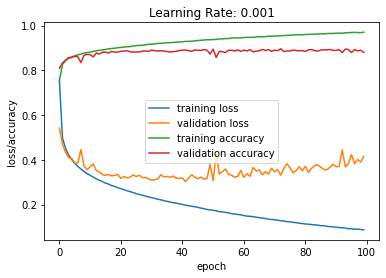

313/313 [==============================] - 0s 894us/step - loss: 0.4367 - accuracy: 0.8776
Learning Rate: 0.001
Test loss: 0.4366748631000519
Test accuracy: 0.8776000142097473
Total number of parameters: 167560
Number of bias parameters: 260


In [8]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

learning_rates = [1, 0.1, 0.001]

for lr in learning_rates:
    # Define the model architecture
    model = keras.Sequential(
        [
            keras.Input(shape=(784)),
            layers.Dense(200, activation="relu"),
            layers.Dense(50, activation="relu"),
            layers.Dense(10),
        ]
    )

    # Compile the model
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=keras.optimizers.SGD(lr=lr),
        metrics=["accuracy"],
    )

    # Train the model
    history = model.fit(x_train.reshape(-1, 784), y_train, epochs=100, batch_size=32, validation_split=0.1)

    # Plot the training and validation loss and accuracy as a function of training epochs
    plt.plot(history.history["loss"], label="training loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.plot(history.history["accuracy"], label="training accuracy")
    plt.plot(history.history["val_accuracy"], label="validation accuracy")
    plt.xlabel("epoch")
    plt.ylabel("loss/accuracy")
    plt.title(f"Learning Rate: {lr}")
    plt.legend()
    plt.show()

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 784), y_test)
    print(f"Learning Rate: {lr}")
    print("Test loss:", test_loss)
    print("Test accuracy:", test_accuracy)

    # Count the total number of parameters and the number of bias parameters in the model
    total_params = model.count_params()
    bias_params = sum([len(layer.get_weights()[1]) for layer in model.layers])
    print("Total number of parameters:", total_params)
    print("Number of bias parameters:", bias_params)

#### Answer:- The best performing model for us is the model with learning rate 0.1, which gives an accuracy of 88.8% on test dataset. There are 167560 total parameters and 260 bias parameters.

### Repeat everything from the previous step but make the hidden layers have linear activation functions. Discuss how this impacts accuracy and why.

Epoch 1/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6426 - accuracy: 0.7789 - val_loss: 0.5335 - val_accuracy: 0.8070
Epoch 2/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4876 - accuracy: 0.8302 - val_loss: 0.4657 - val_accuracy: 0.8290
Epoch 3/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4595 - accuracy: 0.8400 - val_loss: 0.4406 - val_accuracy: 0.8425
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4447 - accuracy: 0.8472 - val_loss: 0.4419 - val_accuracy: 0.8398
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4339 - accuracy: 0.8493 - val_loss: 0.4301 - val_accuracy: 0.8442
Epoch 6/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4274 - accuracy: 0.8512 - val_loss: 0.4309 - val_accuracy: 0.8442
Epoch 7/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4211 - accuracy: 0.8533 - val_loss: 0.4191 - val_ac

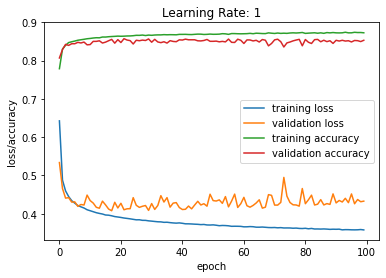

313/313 [==============================] - 0s 768us/step - loss: 0.4635 - accuracy: 0.8381


Learning Rate: 1
Test loss: 0.4634767174720764
Test accuracy: 0.838100016117096
Total number of parameters: 167560
Number of bias parameters: 260
Epoch 1/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6411 - accuracy: 0.7811 - val_loss: 0.5125 - val_accuracy: 0.8183
Epoch 2/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4886 - accuracy: 0.8306 - val_loss: 0.4664 - val_accuracy: 0.8320
Epoch 3/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4615 - accuracy: 0.8388 - val_loss: 0.4477 - val_accuracy: 0.8367
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4437 - accuracy: 0.8450 - val_loss: 0.4720 - val_accuracy: 0.8308
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4350 - accuracy: 0.8488 - val_loss: 0.4266 - val_accuracy: 0.8498
Epoch 6/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4273 - accuracy: 0.8512 - val_loss: 0.4318 - val_a

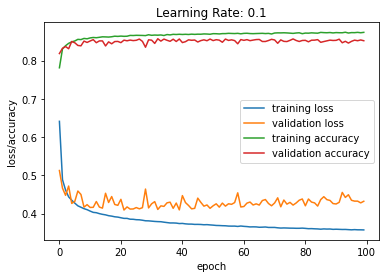

313/313 [==============================] - 0s 934us/step - loss: 0.4664 - accuracy: 0.8371


Learning Rate: 0.1
Test loss: 0.46641209721565247
Test accuracy: 0.8371000289916992
Total number of parameters: 167560
Number of bias parameters: 260
Epoch 1/100
1688/1688 [==============================] - 3s 1ms/step - loss: 0.6410 - accuracy: 0.7844 - val_loss: 0.5054 - val_accuracy: 0.8250
Epoch 2/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4868 - accuracy: 0.8316 - val_loss: 0.4781 - val_accuracy: 0.8280
Epoch 3/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4570 - accuracy: 0.8427 - val_loss: 0.4529 - val_accuracy: 0.8367
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4419 - accuracy: 0.8470 - val_loss: 0.4338 - val_accuracy: 0.8467
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4335 - accuracy: 0.8506 - val_loss: 0.4476 - val_accuracy: 0.8403
Epoch 6/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4257 - accuracy: 0.8525 - val_loss: 0.4218 - v

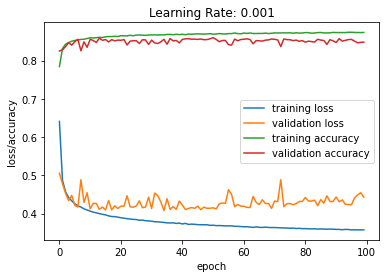

313/313 [==============================] - 0s 817us/step - loss: 0.4770 - accuracy: 0.8367
Learning Rate: 0.001
Test loss: 0.47701171040534973
Test accuracy: 0.8367000222206116
Total number of parameters: 167560
Number of bias parameters: 260


In [9]:
for lr in learning_rates:
    # Define the model architecture
    model = keras.Sequential(
        [
            keras.Input(shape=(784)),
            layers.Dense(200, activation="linear"),
            layers.Dense(50, activation="linear"),
            layers.Dense(10),
        ]
    )

    # Compile the model
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=keras.optimizers.SGD(lr=lr),
        metrics=["accuracy"],
    )

    # Train the model
    history = model.fit(x_train.reshape(-1, 784), y_train, epochs=100, batch_size=32, validation_split=0.1)

    # Plot the training and validation loss and accuracy as a function of training epochs
    plt.plot(history.history["loss"], label="training loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.plot(history.history["accuracy"], label="training accuracy")
    plt.plot(history.history["val_accuracy"], label="validation accuracy")
    plt.xlabel("epoch")
    plt.ylabel("loss/accuracy")
    plt.title(f"Learning Rate: {lr}")
    plt.legend()
    plt.show()

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 784), y_test)
    print(f"Learning Rate: {lr}")
    print("Test loss:", test_loss)
    print("Test accuracy:", test_accuracy)

    # Count the total number of parameters and the number of bias parameters in the model
    total_params = model.count_params()
    bias_params = sum([len(layer.get_weights()[1]) for layer in model.layers])
    print("Total number of parameters:", total_params)
    print("Number of bias parameters:", bias_params)

#### Answer:- We achieve a maximum test accuracy of 83.8% using linear activation function, which is worse than ReLU activation function. The reason for this decrease in accuracy is that linear activation functions can lead to vanishing or exploding gradients during training. This makes it more difficult for the network to learn meaningful representations of the data, which in turn leads to lower accuracy. ReLU activation functions, on the other hand, are known to be more effective at avoiding the vanishing gradient problem, which makes them a better choice for most deep learning tasks. 